In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Считываем датасет из файла train.csv

In [2]:
df = pd.read_csv('train.csv')
print("1. Датасет загружен")
print(f"Размер датасета: {df.shape}")
print()

1. Датасет загружен
Размер датасета: (891, 12)



Визуализируем распределение значений признаков Survived, Pclass, Age, Sex. Parch

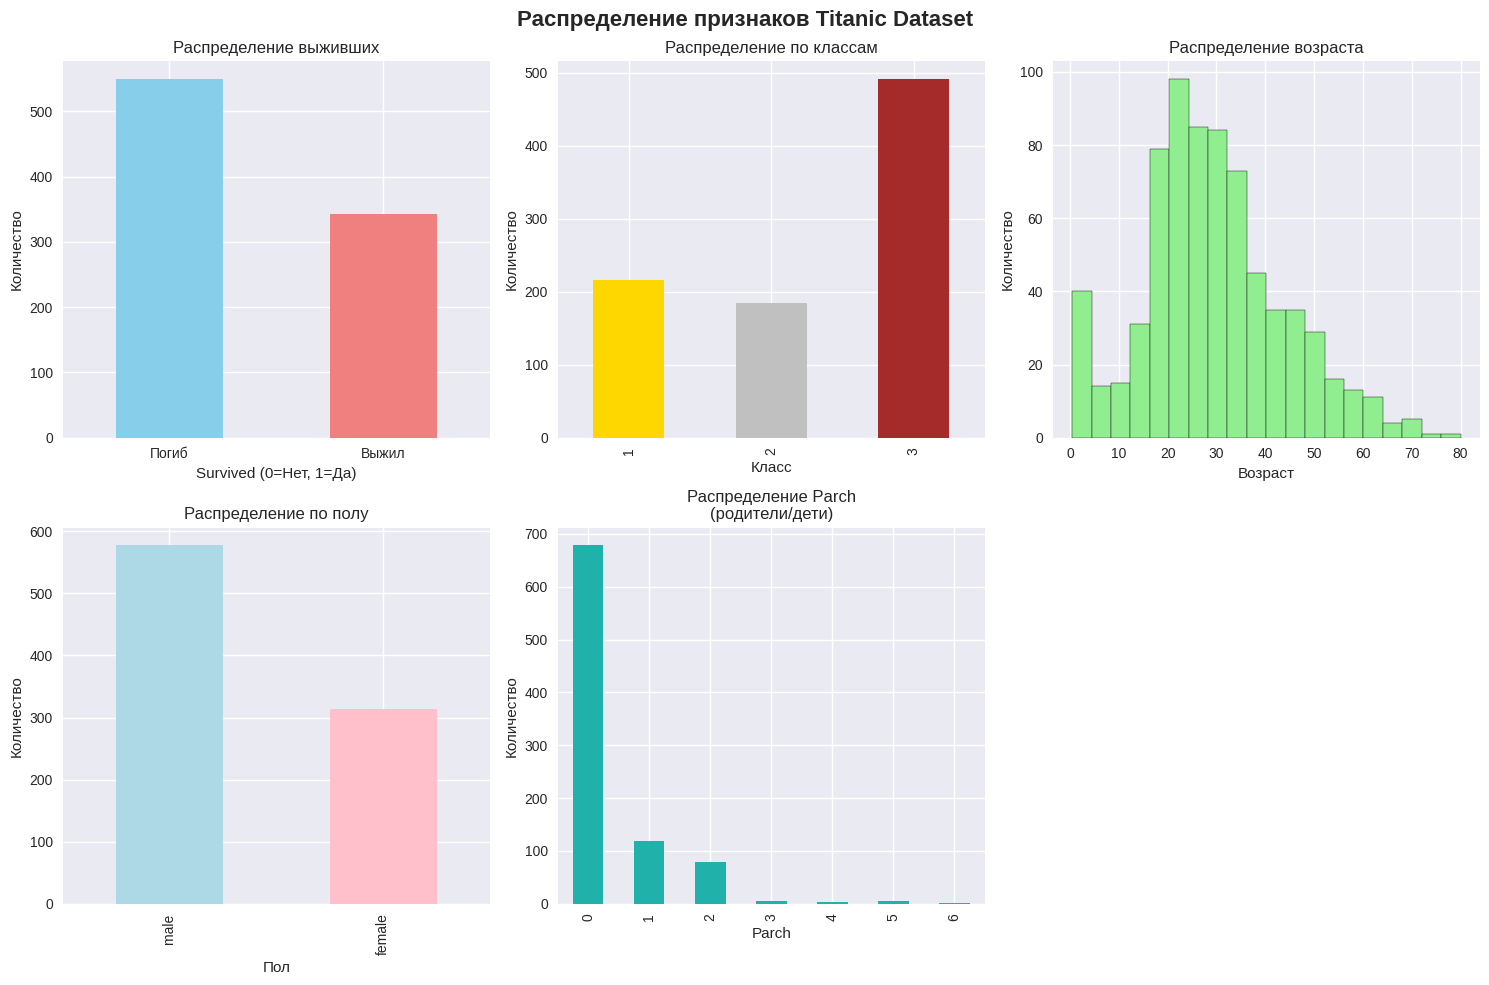

In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение признаков Titanic Dataset', fontsize=16, fontweight='bold')

# Survived
df['Survived'].value_counts().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Распределение выживших')
axes[0,0].set_xlabel('Survived (0=Нет, 1=Да)')
axes[0,0].set_ylabel('Количество')
axes[0,0].set_xticklabels(['Погиб', 'Выжил'], rotation=0)

# Pclass
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color=['gold', 'silver', 'brown'])
axes[0,1].set_title('Распределение по классам')
axes[0,1].set_xlabel('Класс')
axes[0,1].set_ylabel('Количество')

# Age
axes[0,2].hist(df['Age'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Распределение возраста')
axes[0,2].set_xlabel('Возраст')
axes[0,2].set_ylabel('Количество')

# Sex
df['Sex'].value_counts().plot(kind='bar', ax=axes[1,0], color=['lightblue', 'pink'])
axes[1,0].set_title('Распределение по полу')
axes[1,0].set_xlabel('Пол')
axes[1,0].set_ylabel('Количество')

# Parch
df['Parch'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='lightseagreen')
axes[1,1].set_title('Распределение Parch\n(родители/дети)')
axes[1,1].set_xlabel('Parch')
axes[1,1].set_ylabel('Количество')

fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()

График типа boxplot для столбца Age

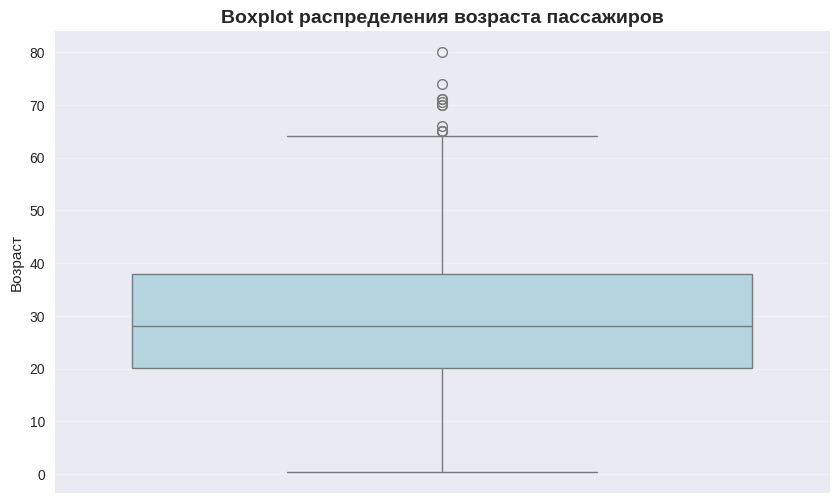

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age', color='lightblue')
plt.title('Boxplot распределения возраста пассажиров', fontsize=14, fontweight='bold')
plt.ylabel('Возраст')
plt.grid(axis='y', alpha=0.3)
plt.show()

Интепретация полученного графика

In [8]:
print("Средний возраст пассажиров: около 28-30 лет")
print("25% пассажиров младше 20 лет (нижний квантиль)")
print("75% пассажиров младше 38 лет (верхний квантиль)")
print("Имеются выбросы - пассажиры старше 60 лет")
print("Распределение возраста слегка скошено вправо")


Средний возраст пассажиров: около 28-30 лет
25% пассажиров младше 20 лет (нижний квантиль)
75% пассажиров младше 38 лет (верхний квантиль)
Имеются выбросы - пассажиры старше 60 лет
Распределение возраста слегка скошено вправо


График типа pie chart для переменных Survived, Pclass, доли в процентах

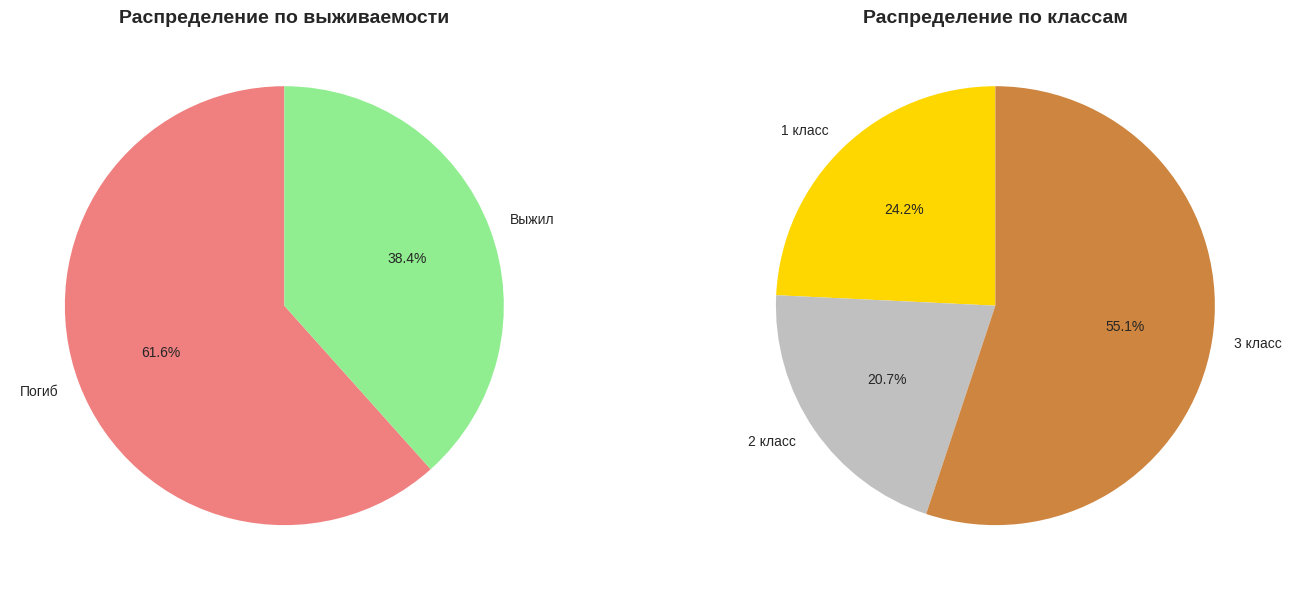

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
#Survived
survived_counts = df['Survived'].value_counts()
colors_survived = ['lightcoral', 'lightgreen']
ax1.pie(survived_counts.values, labels=['Погиб', 'Выжил'], autopct='%1.1f%%',
        colors=colors_survived, startangle=90)
ax1.set_title('Распределение по выживаемости', fontsize=14, fontweight='bold')

#Pclass
pclass_counts = df['Pclass'].value_counts().sort_index()
colors_pclass = ['gold', 'silver', 'peru']
ax2.pie(pclass_counts.values, labels=['1 класс', '2 класс', '3 класс'],
        autopct='%1.1f%%', colors=colors_pclass, startangle=90)
ax2.set_title('Распределение по классам', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

График типа pairplot для всех числовых переменных датасета

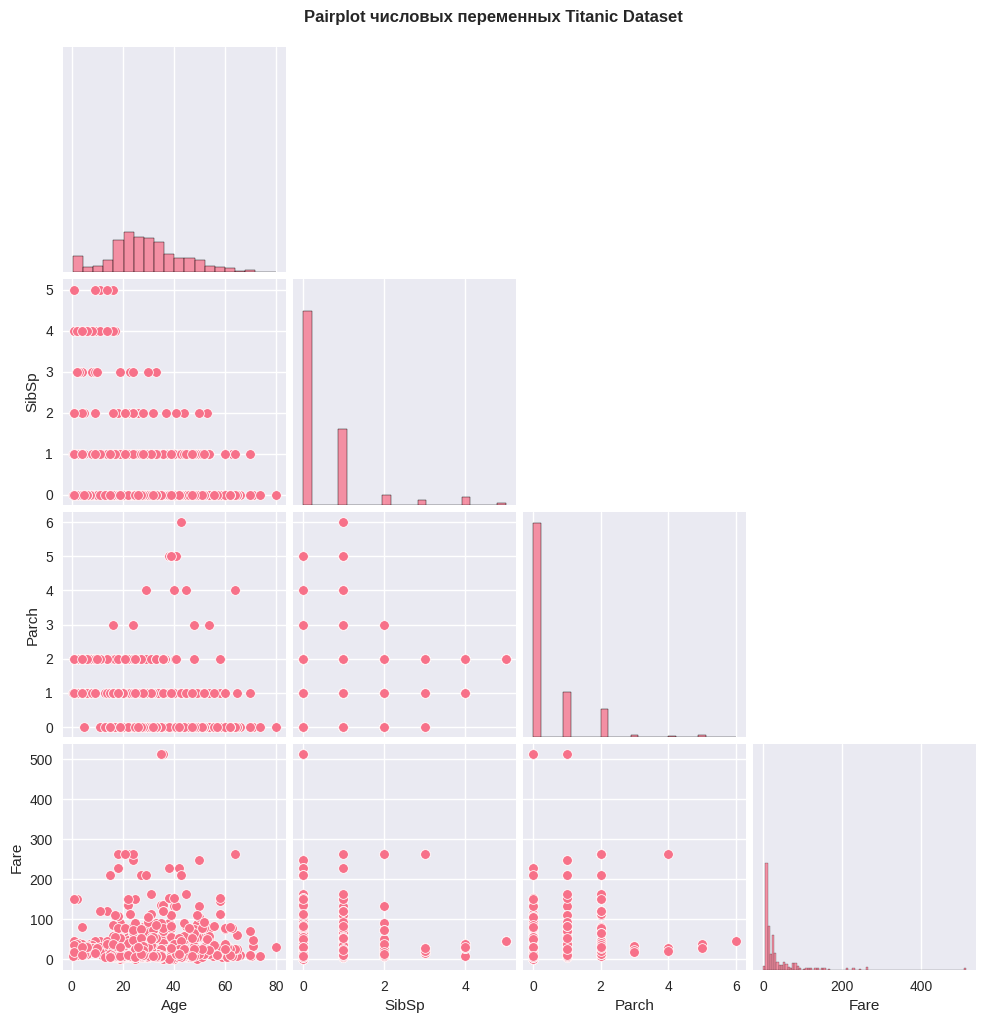

In [10]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[numerical_cols].dropna(), diag_kind='hist', corner=True)
plt.suptitle('Pairplot числовых переменных Titanic Dataset', y=1.02, fontweight='bold')
plt.show()

Интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [11]:
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
sunburst_data['Pclass'] = 'Класс ' + sunburst_data['Pclass'].astype(str)
sunburst_data['Sex'] = sunburst_data['Sex'].map({'male': 'Мужчины', 'female': 'Женщины'})

fig_sunburst = px.sunburst(
    sunburst_data,
    path=['Pclass', 'Sex'],
    values='count',
    title='Распределение пассажиров по классам и полу<br><sub>Sunburst Plot</sub>',
    color='Pclass',
    color_discrete_map={
        'Класс 1': '#FFD700',  # золотой
        'Класс 2': '#C0C0C0',  # серебряный
        'Класс 3': '#CD7F32'   # бронзовый
    }
)

fig_sunburst.update_traces(
    textinfo='label+percent parent',
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<br>Процент от родителя: %{percentParent:.1%}<extra></extra>'
)

fig_sunburst.update_layout(
    title_x=0.5,
    title_font_size=16
)

fig_sunburst.show()

In [13]:
print("\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Всего пассажиров: {len(df)}")
print(f"Выжило: {df['Survived'].sum()} ({df['Survived'].mean()*100:.1f}%)")
print(f"Средний возраст: {df['Age'].mean():.1f} лет")
print(f"Медианный возраст: {df['Age'].median():.1f} лет")
print(f"Распределение по классам:\n{df['Pclass'].value_counts().sort_index()}")
print(f"Распределение по полу:\n{df['Sex'].value_counts()}")


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Всего пассажиров: 891
Выжило: 342 (38.4%)
Средний возраст: 29.7 лет
Медианный возраст: 28.0 лет
Распределение по классам:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Распределение по полу:
Sex
male      577
female    314
Name: count, dtype: int64
